# PROJECT NAME: STOCK MARKET PRICES PREDICTION

## TEAM NAME: GROUP 3

## TA: PERCY

## GROUP MEMBERS: 
### 1. Ayobami Adeniyi
### 2. Ayodeji Anibaba
### 3. Chisom Eluwa
### 4. Khaleed Oyeleke
### 5. Ronke Akinmosin
### 6. Umar Idris

# Table of Contents
### [1. Introduction](#intro)
    1.1. Project overview

    1.2. Project statement
### [2. Import packages and modules](#import)
### [3. Data collection](#Webscraping)
### [4. Load data](#load)
### [5. Data description](#dd)
### [6. Data cleaning](#cleaning)
### [7. Exploratory Data Analysis](#eda)
### [8. Modelling](#pp)
### [9. Conclusion](#conc)

# [1. Introduction](#intro)
---

**Project overview**
---
**The rewards the stock market brings to investors who know how to read it right are enormous while its penalties can be grievous to those who are ignorant, careless or unlucky. Nevertheless, investors are faced with the problem of knowing the right stock to buy and when to buy it. As a result, two different methods have been provided to address these problems. They are Fundamental analysis and Technical analysis.
The fundamental analysis method involves examining auditor’s reports, balance sheets, profit and loss statements, dividend records, companies’ policies, and so on to determine what stock is worth buying or selling.
The technical analysis method involves visualisation (mostly graphical representation) of the stocks trading history like price changes, volume of transaction, etc to determine the trend of the stocks and then making predictions on the future of the stocks based on insights drawn from the visualisation.
The method to be used in this project is Technical Analysis.**

**Problem Statement**
---
**Investors in stocks make losses and gains while trading stocks , but we can help improve the ratio of gains to losses by building a model using machine learning that helps predicts stock market prices and also help them make informed decisions by taking note of indicators in a live chart.**

# [2. Import packages and modules](#import)

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
import mplfinance as fplt
import requests
import json
import plotly.graph_objects as go
from datetime import datetime
%matplotlib inline

# [3. Data collection](#Webscraping)

In [3]:
#retrieving nio stock data from yahoo finance through API
url = "https://apidojo-yahoo-finance-v1.p.rapidapi.com/stock/v2/get-chart"
querystring = {"interval":"1d","symbol":"NIO","range":"10y","region":"US"}
headers = {
    'x-rapidapi-key': "243ef897b3msh844988ee7a01b7fp192ddajsnbd64c87292e2",
    'x-rapidapi-host': "apidojo-yahoo-finance-v1.p.rapidapi.com"
    }

# Using the request library to fetch data and assign the response to response string
response = requests.request("GET", url, headers=headers, params=querystring)

In [ ]:
# let us visualize our data in a more pythonic by way using the JSON conversion
def print_json(response):
    
    """ This fumction prints out the output data(in JSON format) we got from the URL through request library"""
    
    word = json.dumps(response, sort_keys=True, indent=4)
    
    print(word)

    
print_json(response.json())  

In [4]:
# Now we need to save this URL reponse on our local machine in pandas DataFrame format
# Firstly we assing our json response to a new string called data
data=response.json()

In [5]:
# we unpack the collection of data to select each column data
timestam = data["chart"]["result"][0]["timestamp"]
Clos = data["chart"]["result"][0]["indicators"]["quote"][0]["close"]
Ope = data["chart"]["result"][0]["indicators"]["quote"][0]["open"]
lo = data["chart"]["result"][0]["indicators"]["quote"][0]["low"]
hig = data["chart"]["result"][0]["indicators"]["quote"][0]["high"]
Volum = data["chart"]["result"][0]["indicators"]["quote"][0]["volume"]
AdjClos = data["chart"]["result"][0]["indicators"]["adjclose"][0]['adjclose']

In [6]:
# we convert all columns to a format pandas dataframe can work it which is a dictionaries of lists
dict_of_lists = {"timestamp":timestam,
                "Close":Clos,
                "Open":Ope,
                "Low":lo,
                "High":hig,
                "Volume":Volum,
                  "AdjClose":AdjClos }

In [7]:
# we call pandas to convert it to a DataFrame
Nio_df = pd.DataFrame(dict_of_lists)

# we visualize first three rows in the Dataframe
Nio_df.head(3)

,timestamp,Close,Open,Low,High,Volume,AdjClose
0,1536759000,6.6,6.00,5.35,6.93,66849000,6.6
1,1536845400,11.6,6.62,6.52,12.69,158346500,11.6
2,1536931800,9.9,12.66,9.22,13.80,172473600,9.9


In [8]:
# we convert the timestamp column from timestamp format to datetime format
Nio_df['timestamp'] = Nio_df['timestamp'].apply(lambda x: datetime.fromtimestamp(x))
Nio_df['timestamp'] = Nio_df['timestamp'].dt.strftime('%Y-%m-%d')

In [ ]:
# we visualize first three rows in the Dataframe
Nio_df.head(3)

In [10]:
# we use pandas to save the Nio_df to our local machine as an csv file
Nio_df.to_csv("NIO_STOCK_DATA_10yrs.csv")

In [11]:
# we read the "NIO_STOCK_DATA_10yrs.csv" from our local machine to our python terminal
NIO_2yrs = pd.read_csv("NIO_STOCK_DATA_10yrs.csv", index_col=0)

# we convert our timestamp column to datetime format
NIO_2yrs['timestamp']=pd.to_datetime(NIO_2yrs['timestamp'])

# we create a new column 'date' and assign the same data in timestamp column
NIO_2yrs["Date"] = NIO_2yrs["timestamp"]

In [12]:
#creating a column for weekdays before setting timestamp as index and also creating a column indicating the week number e.g week 1
NIO_2yrs['Weekday']=NIO_2yrs['timestamp'].dt.day_name()
NIO_2yrs.head(3)

,timestamp,Close,Open,Low,High,Volume,AdjClose,Date,Weekday
0,2018-09-12,6.600000,6.000000,5.350000,6.930000,66849000,6.600000,2018-09-12,Wednesday
1,2018-09-13,11.600000,6.620000,6.520000,12.690000,158346500,11.600000,2018-09-13,Thursday
2,2018-09-14,9.900000,12.660000,9.220000,13.800000,172473600,9.900000,2018-09-14,Friday
3,2018-09-17,8.500000,9.610000,8.500000,9.750000,56323900,8.500000,2018-09-17,Monday
4,2018-09-18,7.680000,8.730000,7.670000,9.100000,41827600,7.680000,2018-09-18,Tuesday
...,...,...,...,...,...,...,...,...,...
609,2021-02-12,59.849998,60.259998,59.099998,61.049999,39973800,59.849998,2021-02-12,Friday
610,2021-02-16,59.230000,60.400002,58.650002,62.139999,54914800,59.230000,2021-02-16,Tuesday
611,2021-02-17,57.320000,57.919998,55.900002,58.029999,63971200,57.320000,2021-02-17,Wednesday
612,2021-02-18,54.430000,55.450001,52.599998,56.380001,62127000,54.430000,2021-02-18,Thursday


In [13]:
#setting time stamp as index so as to use datetime slicing 
NIO_2yrs = NIO_2yrs.set_index("timestamp")

In [14]:
#inspecting dataframe
NIO_2yrs.head()

,Close,Open,Low,High,Volume,AdjClose,Date,Weekday
timestamp,,,,,,,,
2018-09-12,6.60,6.00,5.35,6.93,66849000,6.60,2018-09-12,Wednesday
2018-09-13,11.60,6.62,6.52,12.69,158346500,11.60,2018-09-13,Thursday
2018-09-14,9.90,12.66,9.22,13.80,172473600,9.90,2018-09-14,Friday
2018-09-17,8.50,9.61,8.50,9.75,56323900,8.50,2018-09-17,Monday
2018-09-18,7.68,8.73,7.67,9.10,41827600,7.68,2018-09-18,Tuesday


# [5. Data description](#dd)
This dataset consists of 2 years data of NIO stock Timestamp, Close prices, Open prices, Low prices, High prices, Volume and AdjClose prices respectively.Stock market opens on weekdays only this does not include public holidays like martin luther king day . This data is available for public usage and research for free

- **Timestamp - This is the respective dates for each market day**

- **Open prices - This is the opeing price for each market day**

- **Close prices - This is the closing price for each market day**

- **Low prices- This is the lowest the price reached for each market day**

- **High prices - This is the highest the price reached for each market day**

- **Volume - This is the quantity of stocks sold and bought that day**

- **Adjusted Closing Price - The adjusted closing price amends a stock's closing price to reflect that stock's value after accounting for any corporate actions. Corporate actions occurs during the period between the market closing and opening the next day**


### Source of data:
The data for this stock is maintained on yahoo finance API.

# [6. Data cleaning](#cleaning)

In [ ]:
#getting a concise summary of the dataframe
NIO_2yrs.info()

In [ ]:
#statistical summary of the data
NIO_2yrs.describe()

In [ ]:
#taking the aggregate of missing values
NIO_2yrs.isna().sum()

**We can see that we have no null column row we can now go ahead with the EDA of this data, because this data is in no much need of cleaning**

# [7. Exploratory Data Analysis](#eda)

## INTERACTIVE VISUALIZATION FOR YEARLY VIEW

In [ ]:
# we plot an interactive candletick to visuialize the stock open and close prices

figure_1 = go.Figure(
        data=[
            go.Candlestick(
            x = a.index,
            low = a['Low'],
            high = a['High'],
            open = a['Open'],
            close = a['Close'],
            increasing_line_color='green',
            decreasing_line_color='red'
            )
        ]
)
figure_1.update_layout(
    title='2018(Sep-Dec)',
    yaxis_title='NIO Stock',
    xaxis_title='Year 2018 to 2021',
    shapes = [dict(
        x0='2020-08-03', x1='2020-08-03', y0=0, y1=1, xref='x', yref='paper',
        line_width=2)],
    annotations=[dict(
        x='2020-08-03', y=0.05, xref='x', yref='paper',
        showarrow=False, xanchor='left', text='Increase Period Begins')]
)

figure_1.show()

**NIO Limited designs, manufactures, and sells electric vehicles in the People's Republic of China, Hong Kong, the United States, the United Kingdom, and Germany. They released their initial public offering (IPO) and started trading in open market in September 2018. They started selling at 6.00$.** **There was a rapid increase in the buying rate(volume) of NIO stocks from second half of 2020 which brought about an increase in growth of the stock price till date**

##  First half and Second Half Overview
**Lets visualize the First and Second halves of each year with interactive candle plots to determine**
- The first open price and last close price
- To determine whether the stock was bullish(gained) or bearish(dipped)
- The peak High and Low price

In [ ]:
# Defining our periods for index slicing
First_H = NIO_2yrs["2018":"2018"]
Second_H = NIO_2yrs["2019-1":"2019-6"]
Third_H = NIO_2yrs["2019-7":"2019"]
Fourth_H = NIO_2yrs["2020-1":"2020-6"]
Fifth_H = NIO_2yrs["2020-7":"2020"]
Sixth_H = NIO_2yrs["2021":"2021"]

## Year 2018 second Half

In [ ]:
figure_2 = go.Figure(
        data=[
            go.Candlestick(
            x = First_H.index,
            low = First_H['Low'],
            high = First_H['High'],
            open = First_H['Open'],
            close = First_H['Close'],
            
            increasing_line_color='green',
            decreasing_line_color='red'
            )
        ]
)


low_time = datetime(2018, 10, 31, 2, 30, 0, 0)
low_px = 5.90

high_time = datetime(2018, 9, 13, 2, 30, 0, 0)
high_px = 11.60


annotations = []
annotations.append(go.layout.Annotation(x=low_time,
                                        y=low_px,
                                        showarrow=True,
                                        arrowhead=1,
                                        arrowcolor="red",
                                        arrowsize=3,
                                        arrowwidth=2,
                                        text="Low"))

annotations.append(go.layout.Annotation(x=high_time,
                                        y=high_px,
                                        showarrow=True,
                                        arrowhead=1,
                                        arrowcolor="green",
                                        arrowsize=3,
                                        arrowwidth=2,
                                        text="High"))

figure_2.update_layout(
    title='2018(Sep-Dec)',
    yaxis_title='NIO Stock',
    annotations=annotations
    
)


figure_2.show()

During this period
- First open price was 6$

- Last close price was 6.37$

- lowest price was 5.90$ on 2018-10-31

- Highest price was 11.60$ on 2018-9-13

**This period was Bullish, the stock gained**

## Year 2019 First Half

In [ ]:
figure_3 = go.Figure(
        data=[
            go.Candlestick(
            x = Second_H.index,
            low = Second_H['Low'],
            high = Second_H['High'],
            open = Second_H['Open'],
            close = Second_H['Close'],
            increasing_line_color='green',
            decreasing_line_color='red'
            )
        ]
)


low_time = datetime(2019, 6, 14, 2, 30, 0, 0)
low_px = 2.42

high_time = datetime(2019, 3, 5, 2, 30, 0, 0)
high_px = 10.16


annotations = []
annotations.append(go.layout.Annotation(x=low_time,
                                        y=low_px,
                                        showarrow=True,
                                        arrowhead=1,
                                        arrowcolor="red",
                                        arrowsize=3,
                                        arrowwidth=2,
                                        text="Low"))

annotations.append(go.layout.Annotation(x=high_time,
                                        y=high_px,
                                        showarrow=True,
                                        arrowhead=1,
                                        arrowcolor="green",
                                        arrowsize=3,
                                        arrowwidth=2,
                                        text="High"))


figure_3.update_layout(
    title='2019(Jan-June)',
    yaxis_title='NIO Stock',
    annotations=annotations
)

figure_3.show()

During this period
- First open price was 6.13$

- Last close price was 2.55$

- lowest price was 2.42$ on 2019-6-14

- Highest price was 10.16$ on 2019-3-5

**This period was Bearish, the stock dipped**

## Year 2019 Second Half

In [ ]:
figure_4 = go.Figure(
        data=[
            go.Candlestick(
            x = Third_H.index,
            low = Third_H['Low'],
            high = Third_H['High'],
            open = Third_H['Open'],
            close = Third_H['Close'],
            increasing_line_color='green',
            decreasing_line_color='red'
            )
        ]
)


low_time = datetime(2019, 10, 1, 2, 30, 0, 0)
low_px = 1.32

high_time = datetime(2019, 12, 31, 2, 30, 0, 0)
high_px = 4.02


annotations = []
annotations.append(go.layout.Annotation(x=low_time,
                                        y=low_px,
                                        showarrow=True,
                                        arrowhead=1,
                                        arrowcolor="red",
                                        arrowsize=3,
                                        arrowwidth=2,
                                        text="Low"))

annotations.append(go.layout.Annotation(x=high_time,
                                        y=high_px,
                                        showarrow=True,
                                        arrowhead=1,
                                        arrowcolor="green",
                                        arrowsize=3,
                                        arrowwidth=2,
                                        text="High"))
    
    
    
    


figure_4.update_layout(
    title='2019(July-Dec)',
    yaxis_title='NIO Stock',
    annotations=annotations
)

figure_4.show()

During this period
- First open price was 2.98$

- Last close price was 1.32$

- lowest price was 2.42$ on 2019-10-1

- Highest price was 4.02$ on 2019-12-31

**This period was Bearish, the stock dipped**

## Year 2020 First Half

In [ ]:
figure_5 = go.Figure(
        data=[
            go.Candlestick(
            x = Fourth_H.index,
            low = Fourth_H['Low'],
            high = Fourth_H['High'],
            open = Fourth_H['Open'],
            close = Fourth_H['Close'],
            increasing_line_color='green',
            decreasing_line_color='red'
            )
        ]
)



low_time = datetime(2020, 3, 23, 2, 30, 0, 0)
low_px = 2.37

high_time = datetime(2020, 6, 30, 2, 30, 0, 0)
high_px = 7.72


annotations = []
annotations.append(go.layout.Annotation(x=low_time,
                                        y=low_px,
                                        showarrow=True,
                                        arrowhead=1,
                                        arrowcolor="red",
                                        arrowsize=3,
                                        arrowwidth=2,
                                        text="Low"))

annotations.append(go.layout.Annotation(x=high_time,
                                        y=high_px,
                                        showarrow=True,
                                        arrowhead=1,
                                        arrowcolor="green",
                                        arrowsize=3,
                                        arrowwidth=2,
                                        text="High"))
    



figure_5.update_layout(
    title='2020(Jan-June)',
    yaxis_title='NIO Stock',
    annotations=annotations,
)

figure_5.show()

During this period
- First open price was 4.1$

- Last close price was 7.72$

- lowest price was 2.37$ on 2020-3-23

- Highest price was 7.72$ on 2020-6-30

**This period was Bullish, the stock gained**

## Year 2020 Second Half

In [ ]:
figure_6 = go.Figure(
        data=[
            go.Candlestick(
            x = Fifth_H.index,
            low = Fifth_H['Low'],
            high = Fifth_H['High'],
            open = Fifth_H['Open'],
            close = Fifth_H['Close'],
            increasing_line_color='green',
            decreasing_line_color='red'
            )
        ]
)


low_time = datetime(2020, 6, 1, 2, 30, 0, 0)
low_px = 4.26

high_time = datetime(2020, 11, 23, 2, 30, 0, 0)
high_px = 55.38


annotations = []
annotations.append(go.layout.Annotation(x=low_time,
                                        y=low_px,
                                        showarrow=True,
                                        arrowhead=1,
                                        arrowcolor="red",
                                        arrowsize=3,
                                        arrowwidth=2,
                                        text="Low"))

annotations.append(go.layout.Annotation(x=high_time,
                                        y=high_px,
                                        showarrow=True,
                                        arrowhead=1,
                                        arrowcolor="green",
                                        arrowsize=3,
                                        arrowwidth=2,
                                        text="High"))
    


figure_6.update_layout(
    title='2020(July-Dec)',
    yaxis_title='NIO Stock',
    shapes = [dict(
        x0='2020-08-01', x1='2020-08-03', y0=0, y1=1, xref='x', yref='paper',
        line_width=2)],
    annotations=[dict(
        x='2020-08-03', y=0.05, xref='x', yref='paper',
        showarrow=False, xanchor='left', text='Increase Period Begins')]
)

figure_6.show()

During this period
- First open price was 4$

- Last close price was 48$

- lowest price was 4.26$ on 2020-6-1

- Highest price was 55.38$ on 2020-11-3

**This period was Bullish, the stock gained greatly**

## Year 2021 First Half

In [ ]:
figure_7 = go.Figure(
        data=[
            go.Candlestick(
            x = Sixth_H.index,
            low = Sixth_H['Low'],
            high = Sixth_H['High'],
            open = Sixth_H['Open'],
            close = Sixth_H['Close'],
            increasing_line_color='green',
            decreasing_line_color='red'
            )
        ]
)


low_time = datetime(2021, 1, 6, 2, 30, 0, 0)
low_px = 50.50

high_time = datetime(2021, 1, 11, 2, 30, 0, 0)
high_px = 62.70


annotations = []
annotations.append(go.layout.Annotation(x=low_time,
                                        y=low_px,
                                        showarrow=True,
                                        arrowhead=1,
                                        arrowcolor="red",
                                        arrowsize=3,
                                        arrowwidth=2,
                                        text="Low"))

annotations.append(go.layout.Annotation(x=high_time,
                                        y=high_px,
                                        showarrow=True,
                                        arrowhead=1,
                                        arrowcolor="green",
                                        arrowsize=3,
                                        arrowwidth=2,
                                        text="High"))
    



figure_7.update_layout(
    title='2020',
    yaxis_title='NIO Stock',
    annotations=annotations
)

figure_7.show()

During this period
- First open price was 51.2$

- Last close price was 57$

- lowest price was 50.50$ on 2021-1-6

- Highest price was 62.70$ on 2021-1-11

**This period was Bullish, the stock gained**

### INSIGHTS GOTTEN FROM SOME CASE STUDIES

#### Case 1: YEAR 2019

**We show a candle plot below for the year 2019 with different moving average values taken into 
consideration. This helps us to identify the trend direction of a stock as well as to determine
its support and resistance levels**

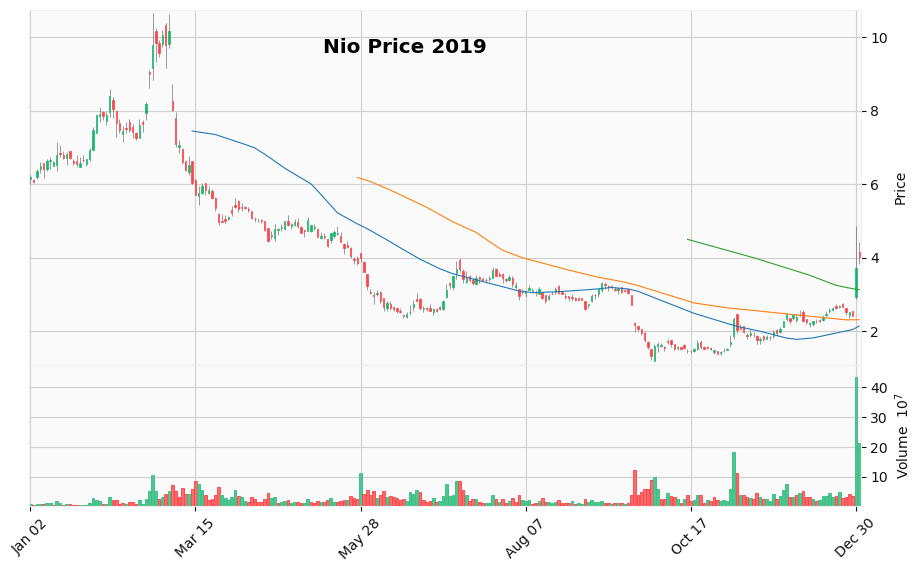

In [15]:
#plotting candle charts for the year 2019
fplt.plot(NIO_2yrs['2019-01':'2019-12'],type='candle',mav=(50,100,200),
         title='Nio Price 2019',volume=True,style='yahoo',figratio=(20,12),tight_layout=True)

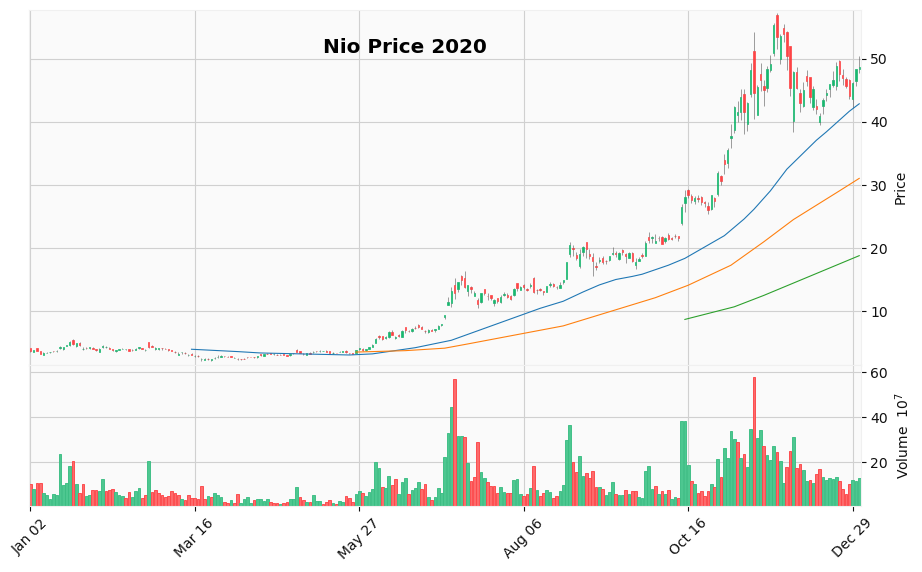

In [20]:
#plotting candle charts for the year 2020
fplt.plot(NIO_2yrs['2020-01':'2020-12'],type='candle',mav=(50,100,200),
         title='Nio Price 2020',volume=True,style='yahoo',figratio=(20,12),tight_layout=True)


**we notice here that the higher the volume leads to increase in price while the reduction in volume brings about a reduction in price**. Trading volume is a measure of how much of a given financial asset has traded in a period of time. For stocks, volume is measured in the number of shares traded and, for futures and options, it is based on how many contracts have changed hands, While the same shares may be traded back and forth multiple times, the volume is counted on each transaction. **High Volume: Generally good stocks have high volume, which reduces liquidity risk. More people are trading these stocks indicate more people want them in their portfolio**

#### Case 2: JULY to DECEMBER 2020

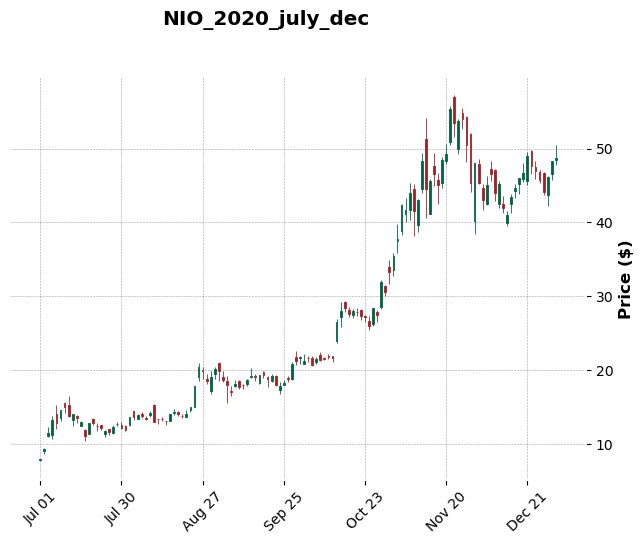

In [16]:
NIO_2020_july_dec = NIO_2yrs["2020-07-1":"2020-12-31"]


fplt.plot(NIO_2020_july_dec,
            type='candle',
            style='charles',
            title='NIO_2020_july_dec',
            ylabel='Price ($)'
        )

**Momentum built for NIO stock amid signs that the Chinese government would make a powerful push to transition the country to electric vehicles. The company also posted strong vehicle delivery numbers, and its monthly delivery updates across july to december showed impressive growth for the business which can be seen vividly in the graphs.**


#### Case 3: YEAR 2021

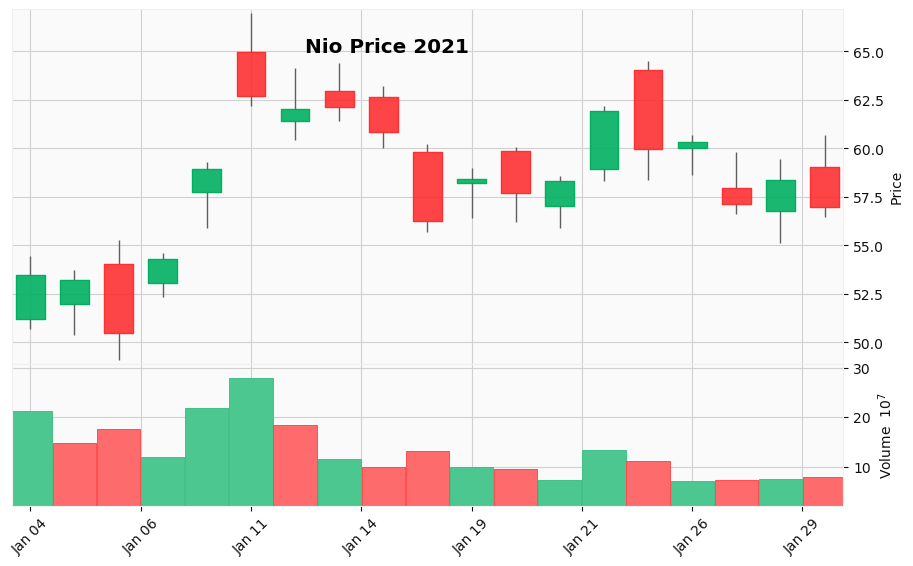

In [17]:
#plotting candle charts for january 2021
fplt.plot(NIO_2yrs['2021-01'],type='candle',mav=(20),
         title='Nio Price 2021',volume=True,style='yahoo',figratio=(20,12),tight_layout=True)

Government subsidies for EV buyers have helped accelerate the growth of the industry in China, and contributed to substantial momentum for NIO. Purchase subsidies were also tied to performance metrics that should correspond with reduced pollution, and NIO vehicles generally performed well in the relevant categories. However, China's Ministry of Finance recently cut subsidies by 20% for 2021 in response to signs of improving organic adoption for EVs, and it remains to be seen how this might impact momentum in the short term

**NIO stock has continued to make gains early in 2021**

#### Case 4: YEAR 2020

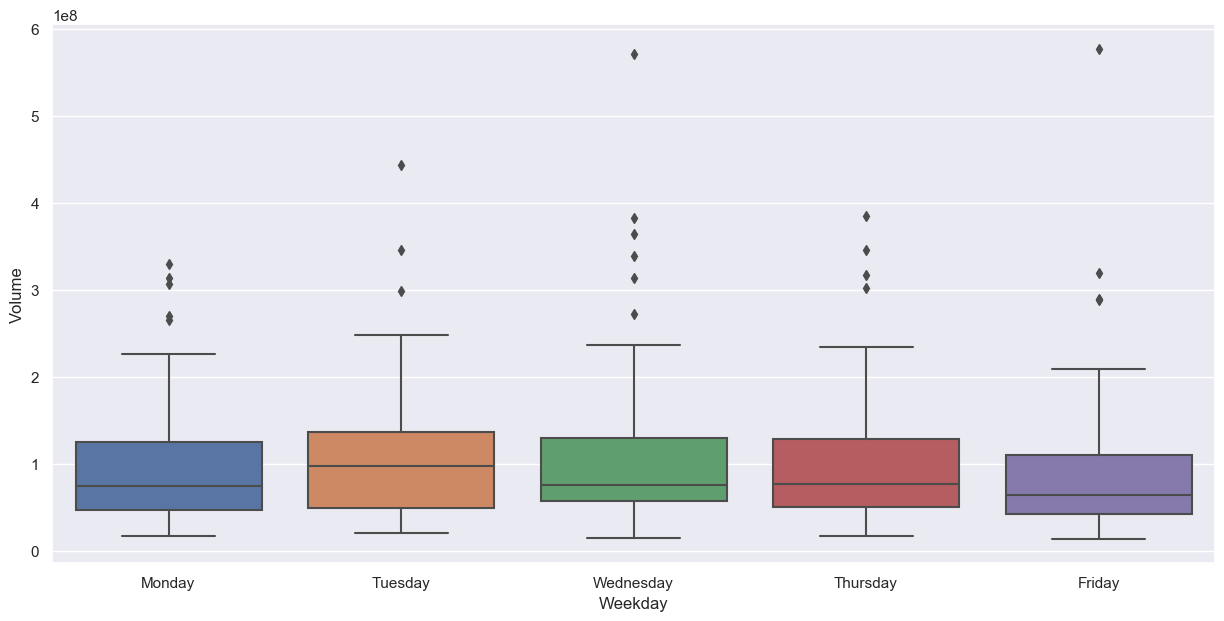

In [18]:
#boxplot showing volumes of data sold on each day of the week for the year 2020
order=['Monday','Tuesday','Wednesday','Thursday','Friday']
sns.set(rc={'figure.figsize':(15,7)})
sns.boxplot(data=NIO_2yrs['2020-01':'2020-12'],x='Weekday',y='Volume',order=order);

**Large stock volumes were mostly traded on Wednesday in the year 2020** 

**Now, we take a look at the correlation of this data**

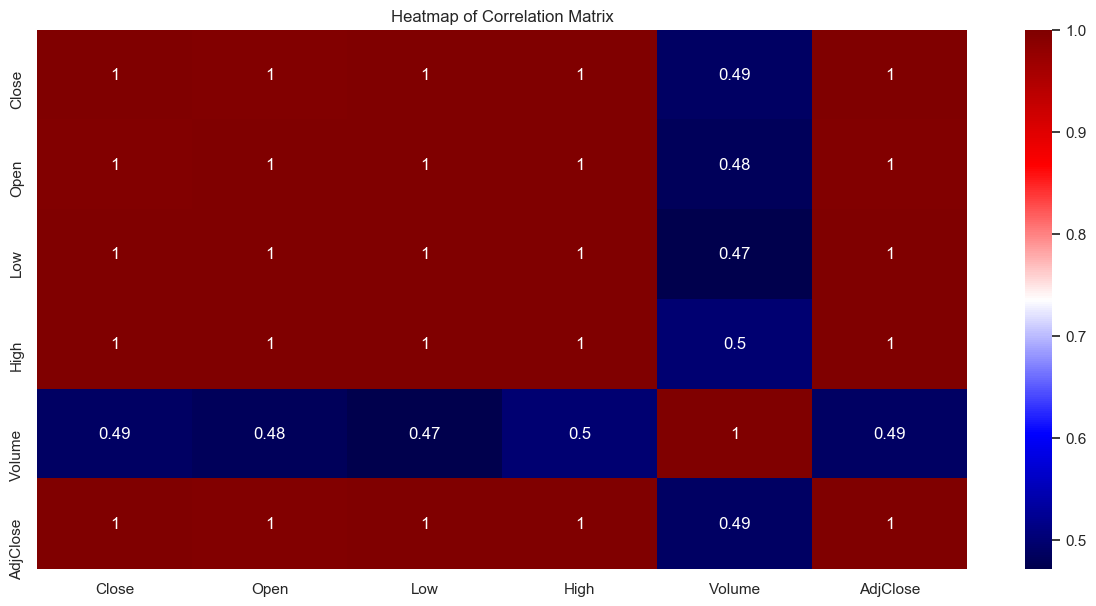

             Close      Open       Low      High    Volume  AdjClose
Close     1.000000  0.997919  0.999042  0.999205  0.489675  1.000000
Open      0.997919  1.000000  0.998928  0.999103  0.482833  0.997919
Low       0.999042  0.998928  1.000000  0.998656  0.471808  0.999042
High      0.999205  0.999103  0.998656  1.000000  0.500016  0.999205
Volume    0.489675  0.482833  0.471808  0.500016  1.000000  0.489675
AdjClose  1.000000  0.997919  0.999042  0.999205  0.489675  1.000000


In [19]:
#Correlation Matrix
corr = NIO_2yrs.corr()
sns.heatmap(corr,annot=True,cmap='seismic',
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)
plt.title('Heatmap of Correlation Matrix')
plt.show();
print(corr)

**There is high correlation between the prices , only volume has 
moderate or low correlation with the remaining price columns**

# [8. Modelling](#pp)

# [9. Conclusion](#conc)